In [1]:
from MAMEDataset import MAMEDataset
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os

DATASET_PATH = fr'datasets/raw/mame'

In [6]:
train_dataset = MAMEDataset(fr'C:/Users/gerard.navarro/Documents/MAI/MAI-DL-LAB-1/datasets/processed/mame/train/labels.csv', 
                            fr'C:/Users/gerard.navarro/Documents/MAI/MAI-DL-LAB-1/datasets/processed/mame/train', header=None)
labels_translation = pd.read_csv(os.path.join(DATASET_PATH, 'MAMe_labels.csv'), header=None)
    
num_to_labels_dict = {}
for _, label in labels_translation.iterrows():
    if label[1] == 'Woven fabric':
        label[1] = 'Woven fabric '
    num_to_labels_dict[label[0]] = label[1]

In [3]:
images_idx_to_show = random.sample(range(0, len(train_dataset)), 25)

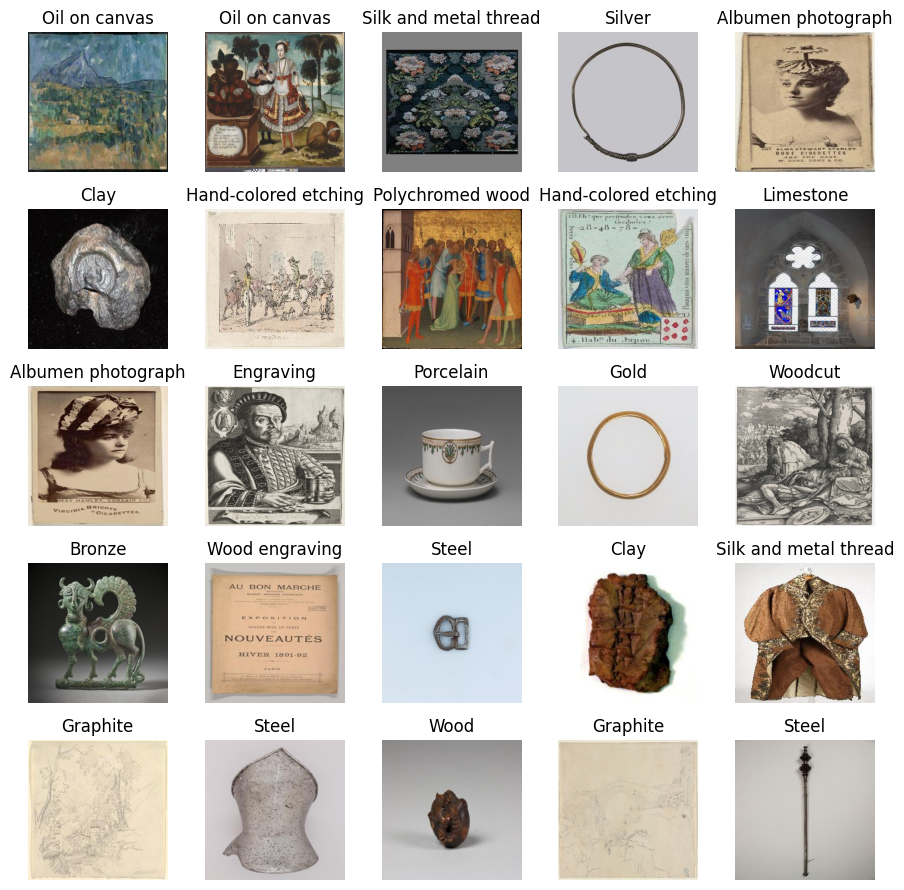

In [4]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(9, 9))

for ax, img_idx in zip(axs.flat, images_idx_to_show):
    image = cv2.cvtColor(train_dataset[img_idx]['image'], cv2.COLOR_BGR2RGB)
    ax.imshow(image)
    ax.set_title(num_to_labels_dict[train_dataset[img_idx]['label'][0]])
    ax.set_axis_off()

plt.tight_layout()
plt.show()

In [16]:
labels_distribution = train_dataset.get_labels_distribution()
for label, counts in dict(labels_distribution).items():
    labels_distribution[num_to_labels_dict[label]] = labels_distribution[label]
    del labels_distribution[label]

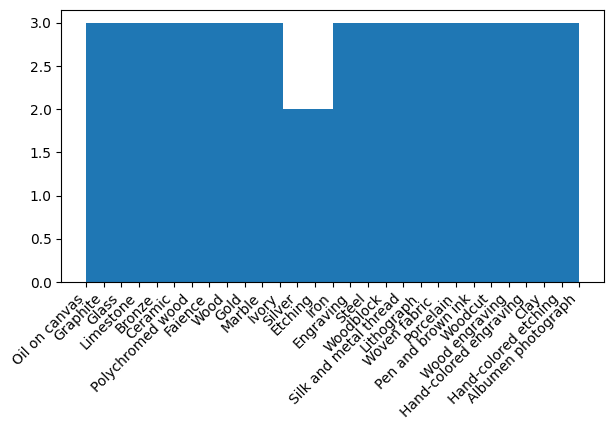

In [22]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.hist(labels_distribution)
fig.autofmt_xdate(rotation=45)